In [1]:
#candidate number-277244

# Report name:

# Physical activity Monitoring Report

# contents

### section 1- Brief introduction

### section 2- Data collection

### section 3- Data cleaning

### section 4 - Exploratory Data Analysis(EDA)
  #### 4.1 - summary of Descriptive statistics
  #### 4.2 - Activity ID counts
  #### 4.3 - Histogram of attribute
  #### 4.4 - Splitting dataset
  #### 4.5 - Average Heartrate by ActivityID
  #### 4.6 - Average Heartrate by SubjectID
  #### 4.7 - Heartrate distribution
  #### 4.8 - Boxplot Heartrate
  #### 4.9 - Boxplot activityID and Heartrate
  #### 4.10 - Hand,chest,ankle average temperature analysis
  #### 4.11 - Average temperature based on subject
  #### 4.12 - Sensor Analysis
  #### 4.13 - Correlation matrix
  

### section 5- Hypothesis testing
   #### 5.1 - Hypothesis testing-1
   #### 5.2 - Hypothesis testing-2

### section 6 - Modeling
   #### 6.1 - Drop unneccessary data
   #### 6.2 - Feature and target selection
   #### 6.3 - Scaling
   #### 6.4 - PCA-principal component analysis
   #### 6.5 - Metrics display
   #### 6.6 - Logistic Regression
   #### 6.7- RandomForest classifier
   #### 6.8 - Comparing predicted and actual data

### section 7 - Conclusion

### section 8 - Bibliography

In [2]:
import os
#importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sn

sn.set()

# 1.  Introduction

The report is based on the physical activity monitoring dataset. It is a collection of different physical activities performed on daily basis to recognise the effect of ativities, which can be used to monitor and improve individual health.  


The Physical Activity Monitoring dataset , contains data of 18 different physical activities (such as walking, cycling, running etc) performed by 9 subjects wearing 3  (IMU) and a heart rate monitor. This data is stored in individual text files per subject. Each row in each subject file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data). IMU sensor data includes hand,chest, ankle -their temperature, their accelaration in $\pm{6g}$ and $\pm{16g}$, gyroscope and magnetometer. There is a file in dataset describing all this attributes. 

**DataCollectionProtocol.pdf** - Containing all the activity.

**DescriptionOfActivity.pdf**- Containing description of activity.

**protocol folder**- Contain information about the readings of each subject. There are 9 subject files.

**Report2_data_info.pdf**- One of the important file containing all the information of data, which data is important or not valid -all the information is kept in this file.

These are main files which I will be using here. 

Our main goal is to find a suitable machine learning model for prediction. The whole project will have 3 parts-
- Data collection or loading, cleaning and wrangling of data, Exploratory Data Analysis.
- Hypothesis testing after finding a correlation from EDA.
- Feature selection, splitting of data, PCA, Model selection



In **section-2** I will perform data collection. I will make the data ready for further analysis and hypothesis testing.

In **section-3**, I will do data cleaning to remove rows containing Nan values, unnecessary columns and duplicate rows also. 

**Section-4** will be focusing on various EDA techniques. Here I tried to derive a correlation between heartrate and handtemperature to conduct further testing.

In **section-5**, I have done hypothesis testing and finally in **section-6** I am using various modelling techniques like logistic regression, random forest classifier to make predictions. 

Our goals is to gain insights that can be devolop hardware/software accurately to determine the quantity and type of physical activitiy need to be carried out by an individual.

# 2.  Data collection

The physical activity monitoring dataset, contains data of different physical activities performed by 9 subjects, wearing 3 IMU and heart rate. This data is stored in individual files group by each subject. Each file represents data like timestamp, activityID, heartrate and IMU sensory data. The activityID represents differeny type of activities like running, sitting, ropejumping etc. 

A list of file names has been create in order to load all the files and create the dataframe. I also created a dictionary containing the activities and activityID. I set up a list of each different category of IMUs - hand, ankle and chest. Then I concatenate all this list to create a collection of columns. Then it reads the data from multiple subject file to create a dataframe by concatenating data from these file. 

In [3]:

wd=os.getcwd()
print(wd)

/Users/srijakarmakar/Downloads/Dataset


In [4]:
path=wd+'/Protocol'

In [5]:
path

'/Users/srijakarmakar/Downloads/Dataset/Protocol'

This are the 9 subject files I am using taking from the protocol files of dataset

In [6]:
files=['/Users/srijakarmakar/Downloads/Dataset/Protocol/subject101.dat',
      '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject102.dat',
       '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject103.dat',
       '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject104.dat',
       '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject105.dat',
       '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject106.dat',
       '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject107.dat',
       '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject108.dat',
       '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject109.dat']

In [7]:
activity= {1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',
           7:'nordic_walking',9:'watching_TV',
          10:'computer_work',11:'car_driving',12:'ascending_stairs',13:'descending_stairs',
          16:'vaccum_cleaning',17:'ironing',18:'folding_laundry',19:'house_cleaning',
          20:'playing_soccer',24:'rope_jumping',0:'other'}

In [8]:
activity

{1: 'lying',
 2: 'sitting',
 3: 'standing',
 4: 'walking',
 5: 'running',
 6: 'cycling',
 7: 'nordic_walking',
 9: 'watching_TV',
 10: 'computer_work',
 11: 'car_driving',
 12: 'ascending_stairs',
 13: 'descending_stairs',
 16: 'vaccum_cleaning',
 17: 'ironing',
 18: 'folding_laundry',
 19: 'house_cleaning',
 20: 'playing_soccer',
 24: 'rope_jumping',
 0: 'other'}

A dictionary has been created with contain the ActivityID and their corresponding activities. There are 19 activities where 'other(0)' is really not needed.

In [9]:
activity_list=list(activity.values())


In [10]:
activity_list

['lying',
 'sitting',
 'standing',
 'walking',
 'running',
 'cycling',
 'nordic_walking',
 'watching_TV',
 'computer_work',
 'car_driving',
 'ascending_stairs',
 'descending_stairs',
 'vaccum_cleaning',
 'ironing',
 'folding_laundry',
 'house_cleaning',
 'playing_soccer',
 'rope_jumping',
 'other']

In [11]:
files

['/Users/srijakarmakar/Downloads/Dataset/Protocol/subject101.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject102.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject103.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject104.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject105.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject106.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject107.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject108.dat',
 '/Users/srijakarmakar/Downloads/Dataset/Protocol/subject109.dat']

In [12]:
subjectID = [1,2,3,4,5,6,7,8,9] 


In [13]:
column_names=["timestamp","activityID","heartrate"]

IMU_hand=['hand_temp','hand_acc16_1','hand_acc16_2','hand_acc16_3',
          'hand_acc6_1','hand_acc6_2','hand_acc6_3',
          'hand_gyro_1','hand_gyro_2','hand_gyro_3',
          'hand_magneto_1','hand_magneto_2','hand_magneto_3',
         'hand_orient_1','hand_orient_2','hand_orient_3','hand_orient_4']

IMU_chest=['chest_temp','chest_acc16_1','chest_acc16_2','chest_acc16_3',
           'chest_acc6_1','chest_acc6_2','chest_acc6_3',
           'chest_gyro_1','chest_gyro_2','chest_gyro_3',
           'chest_magneto_1','chest_magneto_2','chest_magneto_3',
         'chest_orient_1','chest_orient_2','chest_orient_3','chest_orient_4']

IMU_ankle=['ankle_temp','ankle_acc16_1','ankle_acc16_2','ankle_acc16_3',
           'ankle_acc6_1','ankle_acc6_2','ankle_acc6_3',
           'ankle_gyro_1','ankle_gyro_2','ankle_gyro_3',
           'ankle_magneto_1','ankle_magneto_2','ankle_magneto_3',
         'ankle_orient_1','ankle_orient_2','ankle_orient_3','ankle_orient_4']

This are the columns names which consists of IMU data for chest, ankle and hand. Along with that I have timestamp, activityID and heartrate columns. I got all this information regarding the column in "Report2_data_info.pdf" file. According to the file, I set up the columns.

In [14]:
data=column_names+IMU_hand+IMU_chest+IMU_ankle
data

['timestamp',
 'activityID',
 'heartrate',
 'hand_temp',
 'hand_acc16_1',
 'hand_acc16_2',
 'hand_acc16_3',
 'hand_acc6_1',
 'hand_acc6_2',
 'hand_acc6_3',
 'hand_gyro_1',
 'hand_gyro_2',
 'hand_gyro_3',
 'hand_magneto_1',
 'hand_magneto_2',
 'hand_magneto_3',
 'hand_orient_1',
 'hand_orient_2',
 'hand_orient_3',
 'hand_orient_4',
 'chest_temp',
 'chest_acc16_1',
 'chest_acc16_2',
 'chest_acc16_3',
 'chest_acc6_1',
 'chest_acc6_2',
 'chest_acc6_3',
 'chest_gyro_1',
 'chest_gyro_2',
 'chest_gyro_3',
 'chest_magneto_1',
 'chest_magneto_2',
 'chest_magneto_3',
 'chest_orient_1',
 'chest_orient_2',
 'chest_orient_3',
 'chest_orient_4',
 'ankle_temp',
 'ankle_acc16_1',
 'ankle_acc16_2',
 'ankle_acc16_3',
 'ankle_acc6_1',
 'ankle_acc6_2',
 'ankle_acc6_3',
 'ankle_gyro_1',
 'ankle_gyro_2',
 'ankle_gyro_3',
 'ankle_magneto_1',
 'ankle_magneto_2',
 'ankle_magneto_3',
 'ankle_orient_1',
 'ankle_orient_2',
 'ankle_orient_3',
 'ankle_orient_4']

In [15]:
#len(data)
df = pd.DataFrame()

for f in files:
    pdata = pd.read_table(f, header=None, sep='\s+')
    pdata.columns = data
    pdata['subjectID'] = int(f[-5])
    df = pd.concat([df, pdata], ignore_index=True)

df.reset_index(drop=True, inplace=True)



I am trying to read all the subject files and concatenate them into a single DataFrame.

In [16]:
df.head(10) #1st 10 rows of the dataset

timestamp  activityID  heartrate  hand_temp  hand_acc16_1  hand_acc16_2  \
0       8.38           0      104.0       30.0       2.37223       8.60074   
1       8.39           0        NaN       30.0       2.18837       8.56560   
2       8.40           0        NaN       30.0       2.37357       8.60107   
3       8.41           0        NaN       30.0       2.07473       8.52853   
4       8.42           0        NaN       30.0       2.22936       8.83122   
5       8.43           0        NaN       30.0       2.29959       8.82929   
6       8.44           0        NaN       30.0       2.33738       8.82900   
7       8.45           0        NaN       30.0       2.37142       9.05500   
8       8.46           0        NaN       30.0       2.33951       9.13251   
9       8.47           0        NaN       30.0       2.25966       9.09415   

   hand_acc16_3  hand_acc6_1  hand_acc6_2  hand_acc6_3  ...  ankle_gyro_2  \
0       3.51048      2.43954      8.76165      3.35465  ...      0.009250   
1       3.66179      2.39494      8.55081      3.64207  ...     -0.004638   
2       3.54898      2.30514      8.53644      3.73280  ...      0.000148   
3       3.66021      2.33528      8.53622      3.73277  ...     -0.020301   
4       3.70000      2.23055      8.59741      3.76295  ...     -0.014303   
5       3.54710      2.26132      8.65762      3.77788  ...     -0.016024   
6       3.54767      2.27703      8.77828      3.73230  ...     -0.053934   
7       3.39347      2.39786      8.89814      3.64131  ...     -0.039937   
8       3.54668      2.44371      8.98841      3.62596  ...     -0.010042   
9       3.43015      2.42877      9.01871      3.61081  ...     -0.013923   

   ankle_gyro_3  ankle_magneto_1  ankle_magneto_2  ankle_magneto_3  \
0     -0.017580         -61.1888         -38.9599         -58.1438   
1      0.000368         -59.8479         -38.8919         -58.5253   
2      0.022495         -60.7361         -39.4138         -58.3999   
3      0.011275         -60.4091         -38.7635         -58.3956   
4     -0.002823         -61.5199         -39.3879         -58.2694   
5      0.001050         -60.2954         -38.8778         -58.3977   
6      0.015594         -60.6307         -38.8676         -58.2711   
7     -0.000785         -60.5171         -38.9819         -58.2733   
8      0.017701         -61.2916         -39.6182         -58.1499   
9      0.014498         -60.8509         -39.0821         -58.1478   

   ankle_orient_1  ankle_orient_2  ankle_orient_3  ankle_orient_4  subjectID  
0             1.0             0.0             0.0             0.0          1  
1             1.0             0.0             0.0             0.0          1  
2             1.0             0.0             0.0             0.0          1  
3             1.0             0.0             0.0             0.0          1  
4             1.0             0.0             0.0             0.0          1  
5             1.0             0.0             0.0             0.0          1  
6             1.0             0.0             0.0             0.0          1  
7             1.0             0.0             0.0             0.0          1  
8             1.0             0.0             0.0             0.0          1  
9             1.0             0.0             0.0             0.0          1  

[10 rows x 55 columns]

Now our dataset is prepared, The below two codes re just for verfications. Now I will move on to data cleaning procedure.

In [17]:
unique_subjectid_values = df['subjectID'].unique()

print(unique_subjectid_values)
#just for verification

[1 2 3 4 5 6 7 8 9]


In [18]:
unique_activityid_values=df['activityID'].unique()
print(unique_activityid_values)

[ 0  1  2  3 17 16 12 13  4  7  6  5 24]


In [19]:
df.shape #shape of the dataframe

(2872533, 55)

So I created the dataframe and I can see there is 2872533 rows and 55 columns. I will move forward to data-cleaning to check if I can remove some rows and some unnecessary attributes.

# 3. Data Cleaning

The main goal of data cleaning is to imporve the reliability of the data, making it suitable for analysis and decision making. Dirty or unclean data can arise from various source and it shoul be handled properly like - handling of missing values,dealing with duplicates, and more.


Now I will clean some rows and columns to make the dataset more clear. 
For now we have 2872533 rows and 55 columns

In [20]:
df.isnull().sum() #checking the null values

timestamp                0
activityID               0
heartrate          2610265
hand_temp            13141
hand_acc16_1         13141
hand_acc16_2         13141
hand_acc16_3         13141
hand_acc6_1          13141
hand_acc6_2          13141
hand_acc6_3          13141
hand_gyro_1          13141
hand_gyro_2          13141
hand_gyro_3          13141
hand_magneto_1       13141
hand_magneto_2       13141
hand_magneto_3       13141
hand_orient_1        13141
hand_orient_2        13141
hand_orient_3        13141
hand_orient_4        13141
chest_temp            3563
chest_acc16_1         3563
chest_acc16_2         3563
chest_acc16_3         3563
chest_acc6_1          3563
chest_acc6_2          3563
chest_acc6_3          3563
chest_gyro_1          3563
chest_gyro_2          3563
chest_gyro_3          3563
chest_magneto_1       3563
chest_magneto_2       3563
chest_magneto_3       3563
chest_orient_1        3563
chest_orient_2        3563
chest_orient_3        3563
chest_orient_4        3563
a

I am dropping the rows with transient or other activities (activityID-0) as we don't really need it. After removing those rows, we now have 1942872 rows.

**Number of rows removed now is 929661**

In [21]:
df_1=df.drop(df[df.activityID==0].index) #0 is for other activity-we dont need it.
df_1['activityID'].unique()

array([ 1,  2,  3, 17, 16, 12, 13,  4,  7,  6,  5, 24])

In [22]:
df_1.shape

(1942872, 55)

As suggest in the description files, I am removing the data from accelerometer with scale $\pm{6g}$. This is because Of the high impacts caused by certain movements (e.g. during running) with accelaration over 6g it gets saturates sometimes. Therefore the use of the data from the first accelerometer with the scale: $\pm{16g}$ is recommended. I also removed orientation columnns as It is invalid.  As we have 55 columns before, now we have 34 columns. **So number of columns removed is 21.**

In [23]:
drop_columns=['hand_acc6_1','hand_acc6_2','hand_acc6_3','chest_acc6_1','chest_acc6_2','chest_acc6_3',
             'ankle_acc6_1','ankle_acc6_2','ankle_acc6_3','hand_orient_1','hand_orient_2','hand_orient_3','hand_orient_4',
             'chest_orient_1','chest_orient_2','chest_orient_3','chest_orient_4','ankle_orient_1','ankle_orient_2','ankle_orient_3','ankle_orient_4']
df_2=df_1.drop(drop_columns,axis=1)
df_2.shape

(1942872, 34)

In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1942872 entries, 2928 to 2872019
Data columns (total 34 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        float64
 1   activityID       int64  
 2   heartrate        float64
 3   hand_temp        float64
 4   hand_acc16_1     float64
 5   hand_acc16_2     float64
 6   hand_acc16_3     float64
 7   hand_gyro_1      float64
 8   hand_gyro_2      float64
 9   hand_gyro_3      float64
 10  hand_magneto_1   float64
 11  hand_magneto_2   float64
 12  hand_magneto_3   float64
 13  chest_temp       float64
 14  chest_acc16_1    float64
 15  chest_acc16_2    float64
 16  chest_acc16_3    float64
 17  chest_gyro_1     float64
 18  chest_gyro_2     float64
 19  chest_gyro_3     float64
 20  chest_magneto_1  float64
 21  chest_magneto_2  float64
 22  chest_magneto_3  float64
 23  ankle_temp       float64
 24  ankle_acc16_1    float64
 25  ankle_acc16_2    float64
 26  ankle_acc16_3    float64
 27  ankle_gyro_1  

In [25]:
df_2.duplicated().sum() #there is no duplicated rows.

0

Now I am dropping those rows with NaN values. 
Missing sensory data due to wireless data dropping-missing values are indicated with NaN.
Since data is given every 0.01s (due to the fact that IMUs have a sampling frequency of 100Hz, and the sampling frequency of the HR-monitor was approximately 9Hz, the missing HR-values are also indicated with NaN in datafiles.

In [26]:
df_2.dropna(inplace = True)
#df_2.drop_duplicates(inplace= True)
df_2.reset_index(drop=True,inplace=True)
df_2.info()
df_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175498 entries, 0 to 175497
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        175498 non-null  float64
 1   activityID       175498 non-null  int64  
 2   heartrate        175498 non-null  float64
 3   hand_temp        175498 non-null  float64
 4   hand_acc16_1     175498 non-null  float64
 5   hand_acc16_2     175498 non-null  float64
 6   hand_acc16_3     175498 non-null  float64
 7   hand_gyro_1      175498 non-null  float64
 8   hand_gyro_2      175498 non-null  float64
 9   hand_gyro_3      175498 non-null  float64
 10  hand_magneto_1   175498 non-null  float64
 11  hand_magneto_2   175498 non-null  float64
 12  hand_magneto_3   175498 non-null  float64
 13  chest_temp       175498 non-null  float64
 14  chest_acc16_1    175498 non-null  float64
 15  chest_acc16_2    175498 non-null  float64
 16  chest_acc16_3    175498 non-null  floa

(175498, 34)

In [27]:
df_2.isnull().sum() #no null values now

timestamp          0
activityID         0
heartrate          0
hand_temp          0
hand_acc16_1       0
hand_acc16_2       0
hand_acc16_3       0
hand_gyro_1        0
hand_gyro_2        0
hand_gyro_3        0
hand_magneto_1     0
hand_magneto_2     0
hand_magneto_3     0
chest_temp         0
chest_acc16_1      0
chest_acc16_2      0
chest_acc16_3      0
chest_gyro_1       0
chest_gyro_2       0
chest_gyro_3       0
chest_magneto_1    0
chest_magneto_2    0
chest_magneto_3    0
ankle_temp         0
ankle_acc16_1      0
ankle_acc16_2      0
ankle_acc16_3      0
ankle_gyro_1       0
ankle_gyro_2       0
ankle_gyro_3       0
ankle_magneto_1    0
ankle_magneto_2    0
ankle_magneto_3    0
subjectID          0
dtype: int64

#####  Rows removed finally and rows left now:

number of rows after removing the null and duplicate values is 175498. **Number of rows removed is - 1767374**.

##### DType:

It is to be noted that every attribute has a correct dtype. All of the dtype expect activityid and subjectID is float64. dtype of activityID and subjectID is Int64.

# 4. Exploratory Data Analysis

I have carried out some EDA techniques.EDA is used to analyse and visualise datasets to summarize the main characteristics with the help of statistical,graphics and other data visualization methods.Mainly, it helps us to understand the structure and patterns within the data, detect outliers etc.

## 4.1 summary of Descriptive statistics

In [28]:
pd.set_option('display.max_rows', None) ##Just to check the values of all columns.
pd.set_option('display.max_columns', None)
df_2.describe() #summary for basic statistics for each columns

timestamp     activityID      heartrate      hand_temp  \
count  175498.000000  175498.000000  175498.000000  175498.000000   
mean     1694.983481       8.093198     107.314043      32.761121   
std      1091.288920       6.177135      26.952555       1.790775   
min        31.220000       1.000000      57.000000      24.875000   
25%       739.225000       3.000000      86.000000      31.687500   
50%      1467.170000       6.000000     104.000000      33.187500   
75%      2654.185000      13.000000     124.000000      34.062500   
max      4245.650000      24.000000     202.000000      35.500000   

        hand_acc16_1   hand_acc16_2   hand_acc16_3    hand_gyro_1  \
count  175498.000000  175498.000000  175498.000000  175498.000000   
mean       -4.944893       3.567724       3.611669       0.002260   
std         6.253443       6.944834       3.953579       1.326568   
min       -94.135900     -82.550900     -69.093500     -28.135400   
25%        -8.952885       1.044670       1.165758      -0.376981   
50%        -5.421325       3.521345       3.435940      -0.006174   
75%        -0.938708       6.463538       6.550817       0.334159   
max        60.912600     155.354000      65.302700      17.994100   

         hand_gyro_2    hand_gyro_3  hand_magneto_1  hand_magneto_2  \
count  175498.000000  175498.000000   175498.000000   175498.000000   
mean        0.041288      -0.003601       21.026355      -13.981177   
std         0.950139       1.597604       23.814774       24.214329   
min        -9.354930     -13.121500     -102.914000     -197.803000   
25%        -0.219975      -0.376287        4.746878      -29.021200   
50%         0.006064      -0.005747       22.827900      -16.118100   
75%         0.266312       0.364776       39.235275        2.107205   
max        23.077900      13.672200      137.537000       97.706300   

       hand_magneto_3     chest_temp  chest_acc16_1  chest_acc16_2  \
count   175498.000000  175498.000000  175498.000000  175498.000000   
mean       -24.443168      36.181686       0.333002       8.163620   
std         20.113246       1.492995       1.753649       4.882703   
min       -163.766000      31.937500     -39.203400     -38.165700   
25%        -38.822725      35.187500      -0.510282       5.965983   
50%        -23.968000      36.437500       0.438897       9.198975   
75%        -11.210600      37.437500       1.125860       9.776100   
max         99.895700      38.562500      22.138700     125.735000   

       chest_acc16_3   chest_gyro_1   chest_gyro_2   chest_gyro_3  \
count  175498.000000  175498.000000  175498.000000  175498.000000   
mean       -1.440916       0.005949       0.011426      -0.023486   
std         4.776700       0.445262       0.564351       0.316435   
min       -46.599900      -9.343510      -4.859470      -3.705010   
25%        -4.205303      -0.109558      -0.135211      -0.130079   
50%        -1.465785       0.002699       0.000539      -0.016973   
75%         0.527624       0.111307       0.164973       0.082138   
max        31.395600      15.152200       5.822480       2.703920   

       chest_magneto_1  chest_magneto_2  chest_magneto_3     ankle_temp  \
count    175498.000000    175498.000000    175498.000000  175498.000000   
mean          4.512293       -30.583771         4.550784      33.714976   
std          17.063686        17.569752        21.624649       1.091955   
min         -69.617200      -122.480000       -66.428400      30.000000   
25%          -6.076035       -39.893025        -9.817638      33.000000   
50%           2.739820       -33.369900         2.928840      34.062500   
75%          13.951700       -23.957425        20.192275      34.500000   
max          77.300300        39.224800        96.102200      35.437500   

       ankle_acc16_1  ankle_acc16_2  ankle_acc16_3   ankle_gyro_1  \
count  175498.000000  175498.000000  175498.000000  175498.000000   
mean        9.374464      -0.165350      -2.595166       0.0

**From the description of the data-**
- I can see the mean heartrate is about 107.31 and maximum is 202.0 which may be an indication of outliers. I will do further analysis to check on that. 
- The maximum temperature recorded in the hand is 35.5,chest-38.5 and ankle-35.4. Which indicates highest maximum temperature is recorded in chest.
- Mean Handtemp is 32.76, Mean chesttemp is 36.18 and Mean ankletemp is 33.71.


## 4.2  Activity ID counts

I plot a bargraph to check the count of unique activityID. I can see activityID-17(ironing)has highest count. 

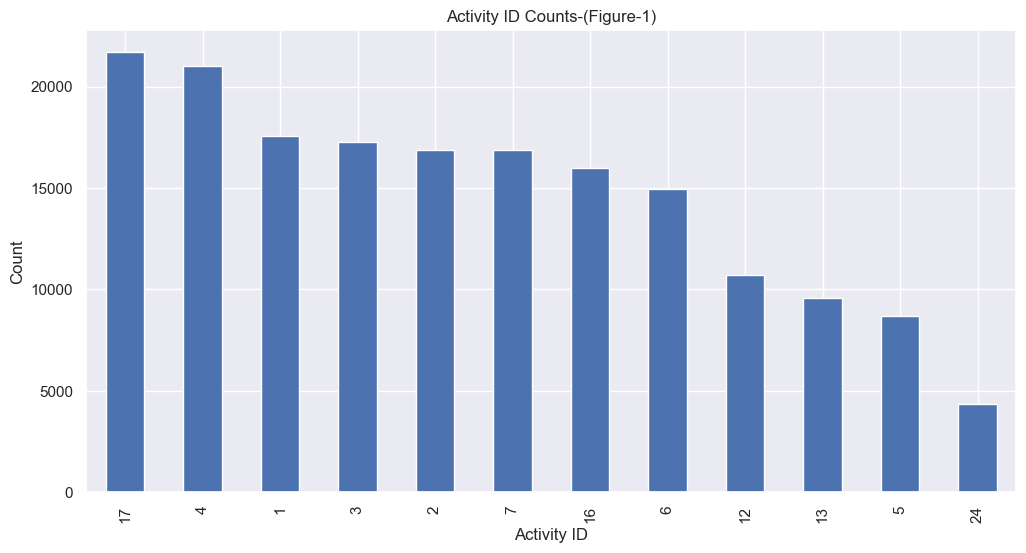

In [29]:
df_2['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.title('Activity ID Counts-(Figure-1)')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.show()

## 4.3 Histgram of the attributes

From the below histogram plot, I can say most of the attribute is not normally distributed. There also appears to be outliers in hand temperature dataset and heartrate. I will analyse the different attribute individually. 

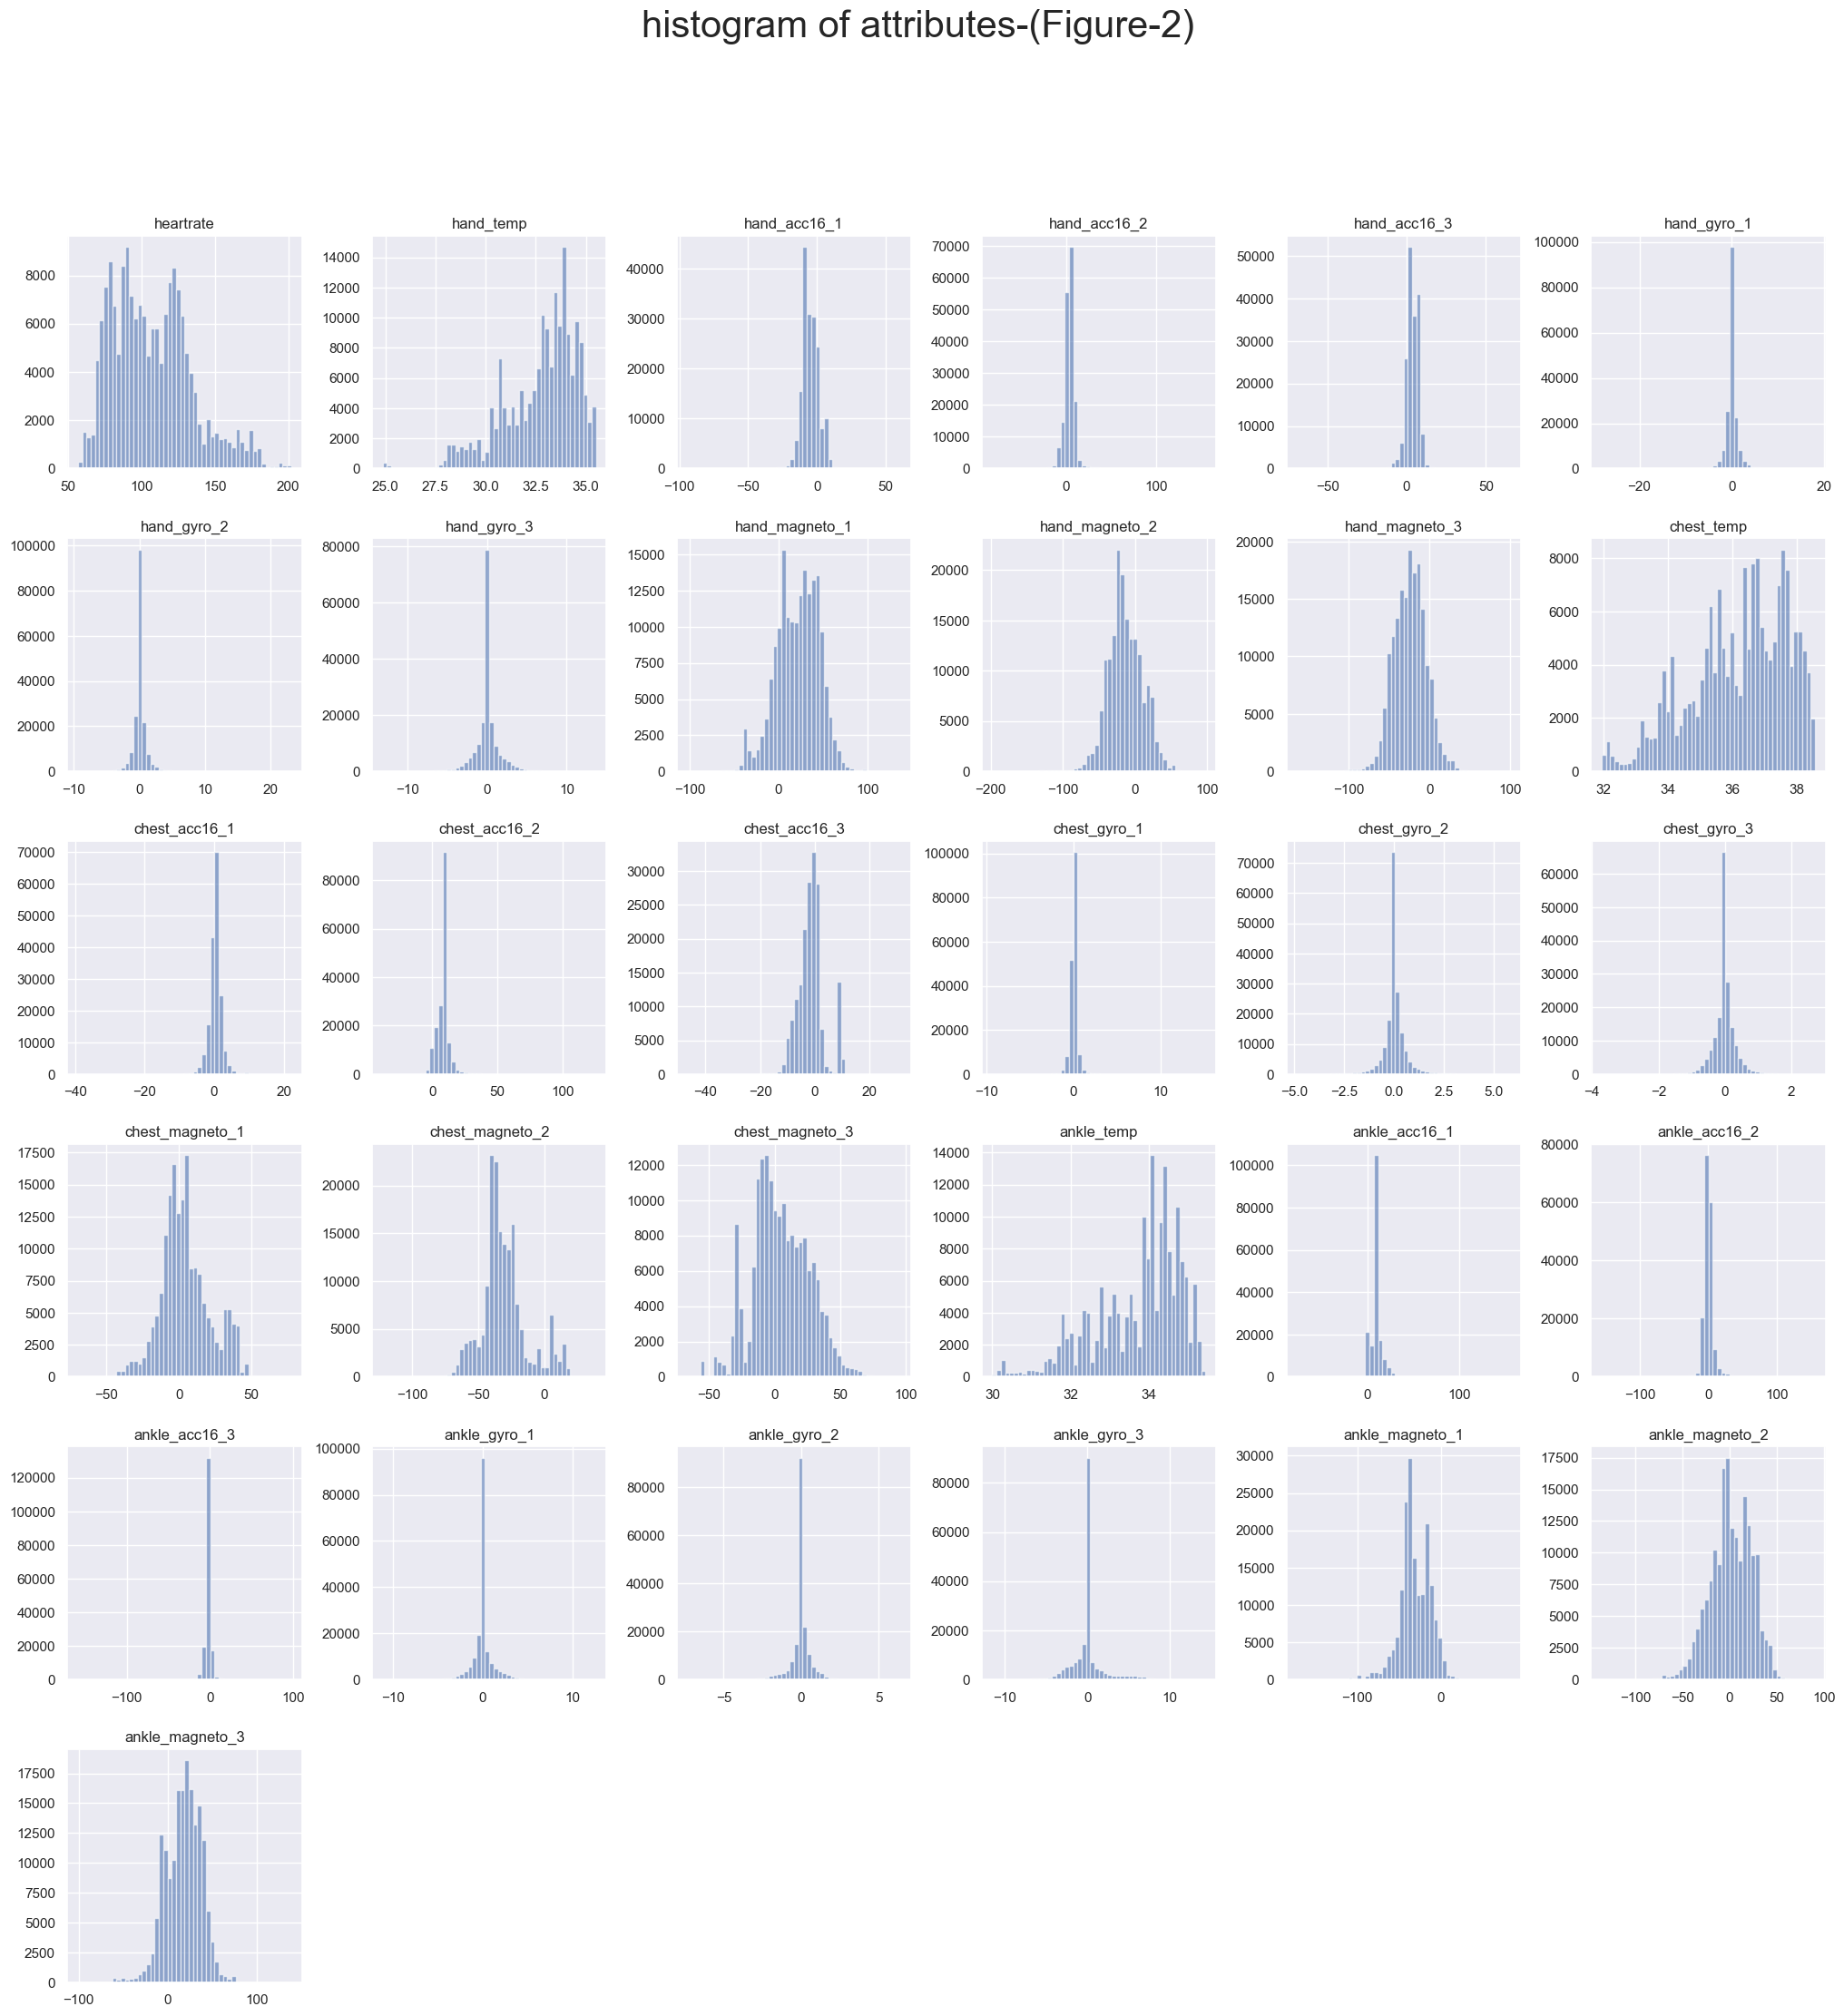

In [30]:
dist_df=df_2.drop(['timestamp','activityID','subjectID'],axis=1)
dist_df.hist(figsize=(25,25),bins=50,alpha=0.6)
plt.suptitle('histogram of attributes-(Figure-2)',fontsize=30)
plt.show()

## 4.4 splitting dataset

For doing further analysis and gaining insights from the data, I do a further split of data into train and test data. I will do the EDA on the train data(train_df) and Hypothesis testing on the test data(test_df). Using sampling method, I randomly select 80% of the data for training (train_df) and rest of the data for testing (test_df). 


In [31]:
train_df = df_2.sample(frac=0.8, random_state=1) #splitting the dataset into training and testing data
test_df = df_2.drop(train_df.index)

In [32]:
train_df.describe()

timestamp     activityID      heartrate      hand_temp  \
count  140398.000000  140398.000000  140398.000000  140398.000000   
mean     1695.541916       8.098150     107.347491      32.759226   
std      1092.046330       6.180758      26.970518       1.791442   
min        31.220000       1.000000      57.000000      24.875000   
25%       739.030000       3.000000      86.000000      31.687500   
50%      1467.045000       6.000000     104.000000      33.187500   
75%      2655.905000      13.000000     124.000000      34.062500   
max      4245.650000      24.000000     202.000000      35.500000   

        hand_acc16_1   hand_acc16_2   hand_acc16_3    hand_gyro_1  \
count  140398.000000  140398.000000  140398.000000  140398.000000   
mean       -4.941774       3.560942       3.602248       0.003684   
std         6.252733       6.963616       3.963368       1.329589   
min       -87.364600     -72.083900     -69.093500     -28.135400   
25%        -8.950825       1.042428       1.154980      -0.375690   
50%        -5.423785       3.521345       3.430650      -0.006166   
75%        -0.933864       6.453900       6.543518       0.334529   
max        36.935000     155.354000      65.302700      17.994100   

         hand_gyro_2    hand_gyro_3  hand_magneto_1  hand_magneto_2  \
count  140398.000000  140398.000000   140398.000000   140398.000000   
mean        0.039598      -0.002492       21.045379      -13.971187   
std         0.949500       1.595620       23.813919       24.212793   
min        -9.354930     -13.121500     -102.914000     -197.803000   
25%        -0.220511      -0.376125        4.804570      -29.002100   
50%         0.005992      -0.005670       22.821750      -16.111100   
75%         0.265771       0.365011       39.237050        2.107755   
max        23.077900      13.436200      137.537000       93.044800   

       hand_magneto_3     chest_temp  chest_acc16_1  chest_acc16_2  \
count   140398.000000  140398.000000  140398.000000  140398.000000   
mean       -24.451426      36.179718       0.333397       8.152016   
std         20.096307       1.492742       1.756946       4.880380   
min       -163.766000      31.937500     -39.203400     -38.165700   
25%        -38.836675      35.187500      -0.512732       5.952625   
50%        -23.986300      36.437500       0.437485       9.193550   
75%        -11.211575      37.437500       1.123318       9.775028   
max         99.895700      38.562500      22.138700     125.735000   

       chest_acc16_3   chest_gyro_1   chest_gyro_2   chest_gyro_3  \
count  140398.000000  140398.000000  140398.000000  140398.000000   
mean       -1.450910       0.006393       0.010208      -0.023284   
std         4.786916       0.449558       0.562681       0.317172   
min       -46.599900      -9.343510      -4.859470      -3.705010   
25%        -4.220847      -0.109745      -0.135482      -0.130473   
50%        -1.470205       0.002643       0.000416      -0.016939   
75%         0.524309       0.111294       0.164054       0.081658   
max        31.267800      15.152200       4.542910       2.534700   

       chest_magneto_1  chest_magneto_2  chest_magneto_3     ankle_temp  \
count    140398.000000    140398.000000    140398.000000  140398.000000   
mean          4.521438       -30.572688         4.586431      33.713788   
std          17.074151        17.575340        21.633472       1.092038   
min         -69.617200      -122.480000       -66.428400      30.000000   
25%          -6.083778       -39.890175        -9.772270      33.000000   
50%           2.769405       -33.332550         2.975840      34.062500   
75%          13.963625       -23.940200        20.237375      34.500000   
max          75.051300        38.848200        96.102200      35.437500   

       ankle_acc16_1  ankle_acc16_2  ankle_acc16_3   ankle_gyro_1  \
count  140398.000000  140398.000000  140398.000000  140398.000000   
mean        9.366840      -0.179566      -2.592621       0.0

## 4.5 Average heartrate by activityID

Average heartrate of running and ropejumping activity appears to highest from this below barplot where as lying and sitting has lowest average heartrate. That means most physically demanding activity must have higher average heartrate. So I am considering ropejumping,running as a rigorous activity and sitting,lying as light activity. I am doing this as I need it during hypothesis testing.

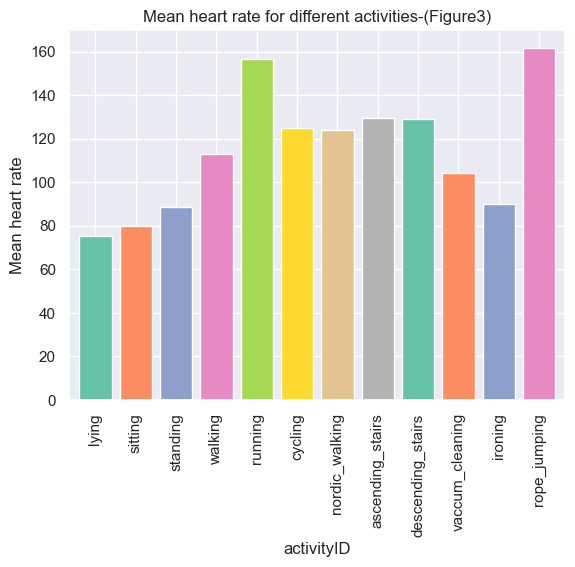

In [33]:
df_HR_activity=train_df['heartrate'].groupby(train_df['activityID']).mean()
df_HR_activity.index=df_HR_activity.index.map(activity)
#plotting the graph
palette = sn.color_palette("Set2")
df_HR_activity.plot(kind='bar',color=palette,width=0.8)
plt.ylabel("Mean heart rate")
plt.title("Mean heart rate for different activities-(Figure3)")
plt.show()

## 4.6 average heart rate by subjectID

Subject-9 has highest average heartrate followed by subject-1. subject-3 has lowest average heartrate

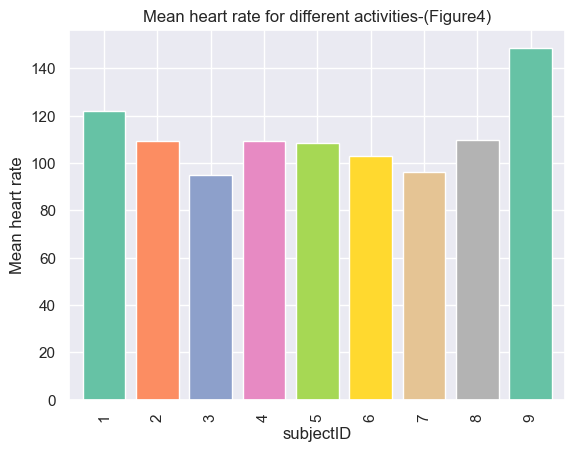

In [34]:
df_HR_subject=train_df['heartrate'].groupby(train_df['subjectID']).mean()
#ploting the barplot
palette = sn.color_palette("Set2")
df_HR_subject.plot(kind='bar',color=palette,width=0.8)
plt.ylabel("Mean heart rate")
plt.title("Mean heart rate for different activities-(Figure4)")
plt.show()

## 4.7 Heartrate distribution

I am using distplot here. The goal of distplot is to visualise the unvariate distribution of a dataset, showing the distribution of a single variable. I plot a graph for heartrate distribution here.

The distribution plots(below) shows a positive skew. It occours when right tail of a distriution is longer, The distribution is concentrated on the left of the figure. we can say it as right-skewed or right-tailed despite that the curve appears to be skewed or leaning to the left(left-leaning curve). The mean here will be located rightside of the graph and greater than median and mode.It indicates there are number of data points , may be outliers that are greater than the mode. It seems like high percentage of heartrate is clustered around 70 and 140. 

I also created a boxplot for understanding the skewness of the heartrate distribution. 

Text(0, 0.5, 'Density')

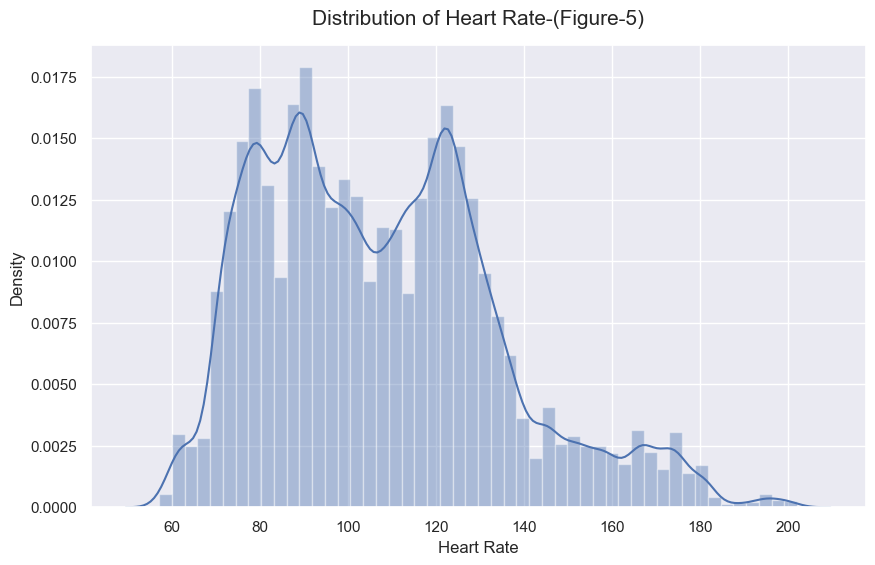

In [35]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10,6))
sn.distplot(train_df['heartrate'])
plt.title('Distribution of Heart Rate-(Figure-5)', fontsize=15, pad=15)
plt.xlabel('Heart Rate')
plt.ylabel('Density')

## 4.8 boxplot heartrate
BoxPlots provides a visual desription of the variability of values in dataset. They shows the median, upper and lower quartile , minimum ,maximum values and any outliers in the dataset.Outliers are the observations that lie an abnormal distance from other value of the sample.

The boxplot indicates most of the heartrate is clustered around the mean and ranges 85-124. The outliers starting at 180-201. 

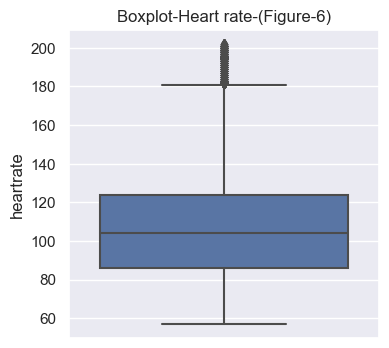

In [36]:
fig,ax=plt.subplots(figsize=(4,4))
sn.boxplot(y=train_df["heartrate"])
plt.title("Boxplot-Heart rate-(Figure-6)")
plt.show()


## 4.9 Boxplot for activity ID and heart rate

It seems like there are many outliers in most of the activities except activity-3,4,12,13,24. Activity-13 and 24 is normally distributed.I can suggest that there may be variations in the data distribution accross different activities. 

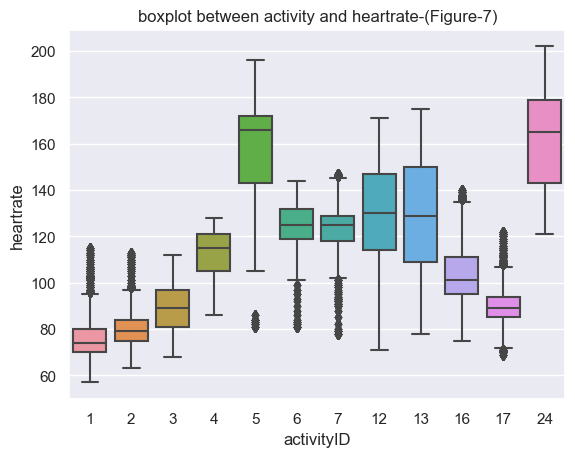

In [37]:
sn.boxplot(x='activityID',y='heartrate',data=train_df)
plt.title("boxplot between activity and heartrate-(Figure-7)")
plt.xlabel('activityID')
plt.ylabel('heartrate')
plt.show()
#boxplot describes data like minimum value, median and maximum value of heartrate during each activity.

## 4.10 Hand,ankle,chest average temperature Analysis

Here is the boxplot for hand,ankle and chest temperature for different activityID. (From figure-8,9 and 10)
- For hand_temp,activity-6 is normally distributed. Activity-24 appears to be right-skewed. 
- For chest_temp, there are no outliers in any of the activityID and most of them are not normally distributed.
- For ankle_temp, there are some outliers in activity-16 and none of them are normally distributed.

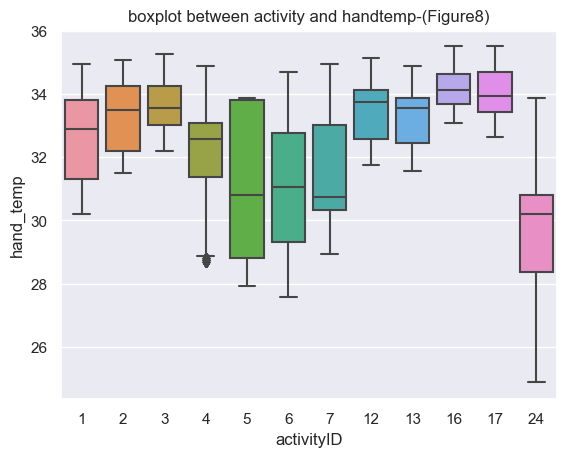

In [38]:
#boxplot(train_df,"activityID","hand_temp")
sn.boxplot(x='activityID',y='hand_temp',data=train_df)
plt.title("boxplot between activity and handtemp-(Figure8)")
plt.xlabel('activityID')
plt.ylabel('hand_temp')
plt.show()

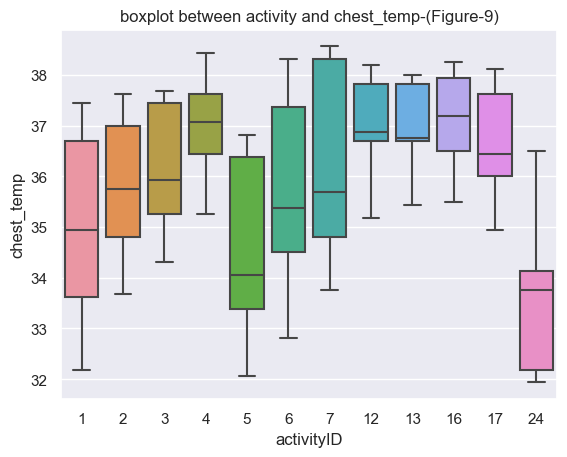

In [39]:
sn.boxplot(x='activityID',y='chest_temp',data=train_df)
plt.title("boxplot between activity and chest_temp-(Figure-9)")
plt.xlabel('activityID')
plt.ylabel('chest_temp')
plt.show()

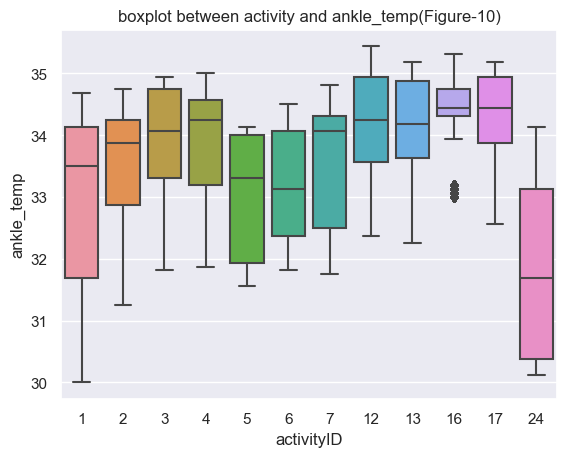

In [40]:
sn.boxplot(x='activityID',y='ankle_temp',data=train_df)
plt.title("boxplot between activity and ankle_temp(Figure-10)")
plt.xlabel('activityID')
plt.ylabel('ankle_temp')
plt.show()

From Figure-11
- Activity-4,13,12,16 has highest average chest temperature and activity-24 is lowest
- Activity-16 has highest average hand temperature and activity-5 has lowest hand temperature
- Activity-16,17,13 has highest ankle temperature and activity-24 has lowest. 

Though activity-5 and activity-24 (running and ropejumping) is most physical demanding activity and their heart rate is also high, but their overall hand, ankle and chest temperature seems to be low. So I will analyse if I can found any correlation between any of these attributes.

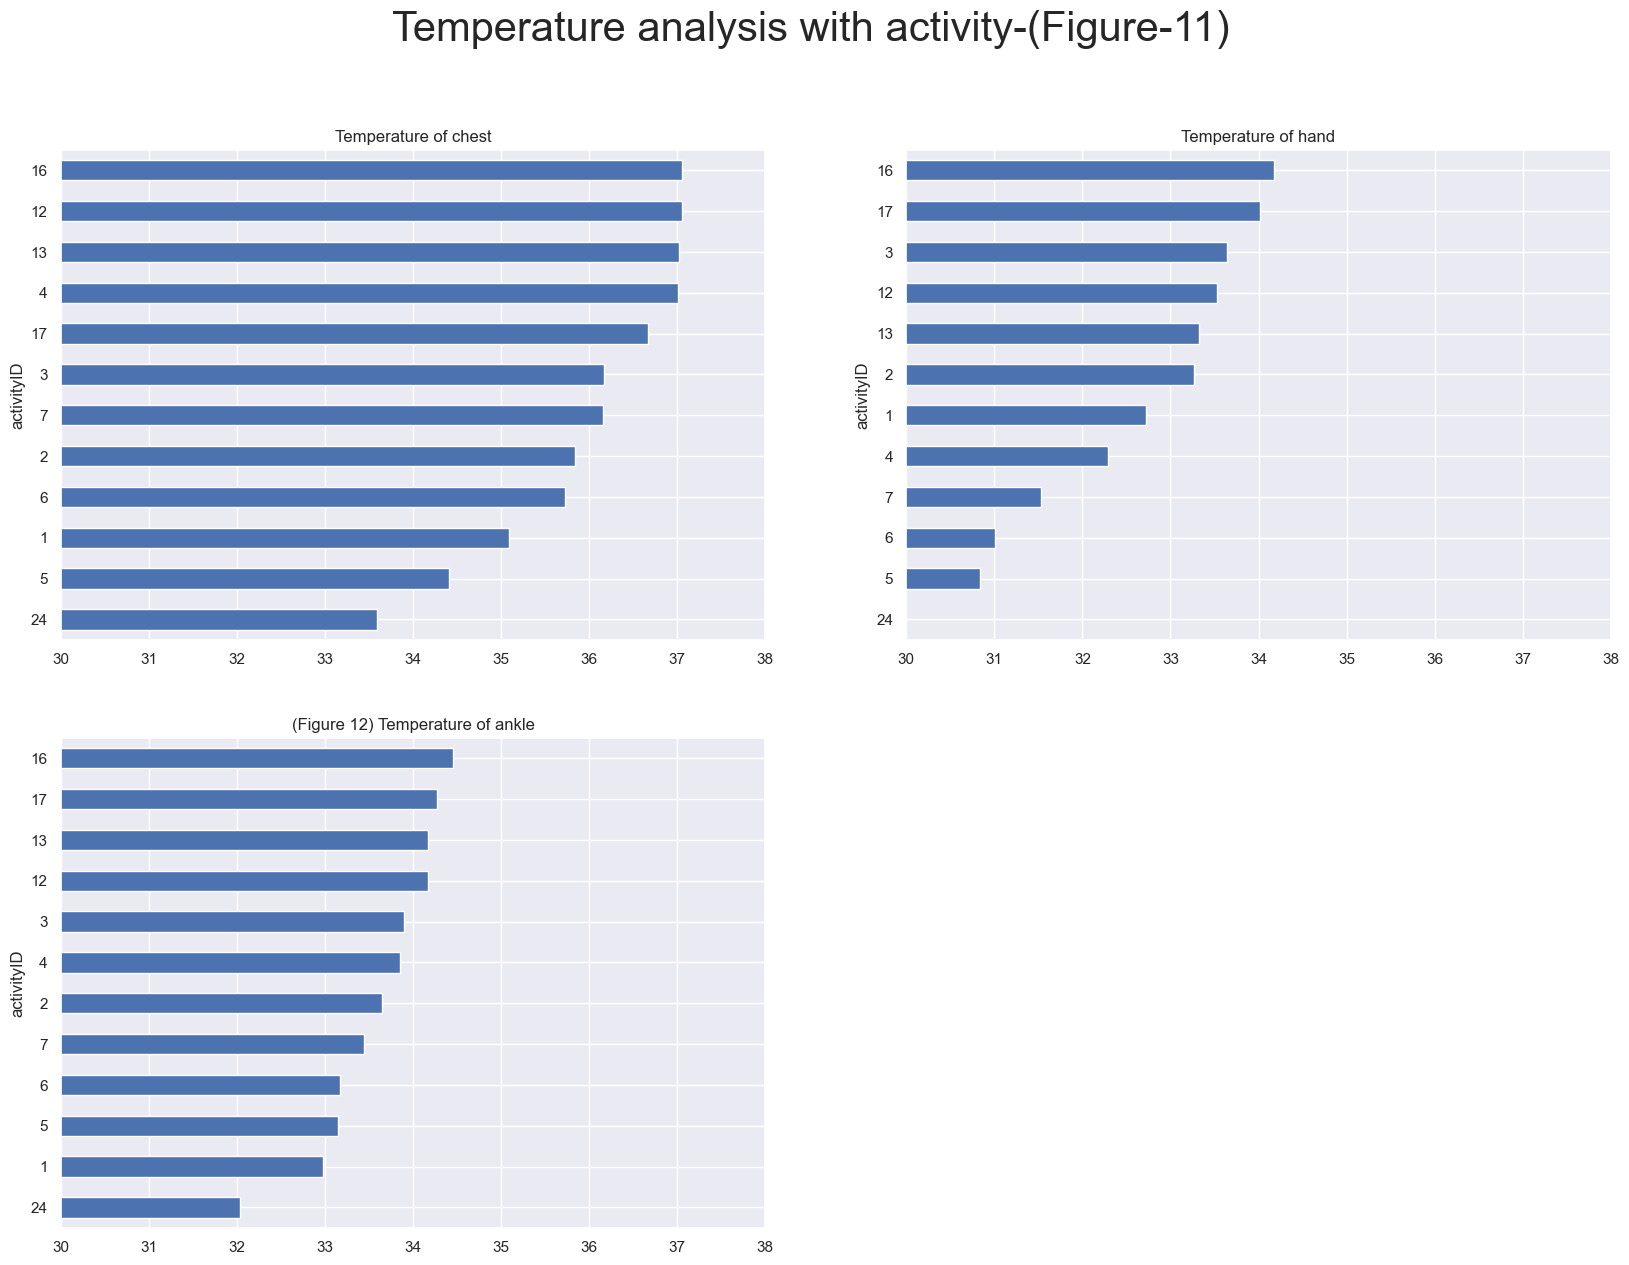

In [41]:
# plots to display the different activities with their respective temperatures

plt.figure(figsize=(20,14))
plt.setp(ax, xlim=(30,40))
plt.suptitle("Temperature analysis with activity-(Figure-11)",fontsize=30)
ax1=plt.subplot(221)
ax1.set_title('Temperature of chest')
ax1.set_xlabel('Temperature')
train_df['chest_temp'].groupby(train_df['activityID']).mean().sort_values(ascending=True).plot(kind='barh')
ax1.set_xlim([30,38])

ax2 = plt.subplot(222)
ax2.set_title('Temperature of hand')
ax2.set_xlabel('Temperature')
train_df['hand_temp'].groupby(train_df['activityID']).mean().sort_values(ascending=True).plot(kind='barh')
ax2.set_xlim([30,38])

ax3= plt.subplot(223)
ax3.set_title('(Figure 12) Temperature of ankle')
ax3.set_xlabel('Temperature')
train_df['ankle_temp'].groupby(train_df['activityID']).mean().sort_values(ascending=True).plot(kind='barh')
ax3.set_xlim([30,38])
plt.show()

In [42]:
#mean hand temperature for different activity
x=train_df['hand_temp'].groupby(train_df['activityID']).mean()
x

activityID
1     32.725553
2     33.271324
3     33.637300
4     32.292663
5     30.834346
6     31.009813
7     31.533710
12    33.532286
13    33.321711
16    34.176310
17    34.015429
24    29.686185
Name: hand_temp, dtype: float64

In [43]:
#mean chest temperature for different activity
y=train_df['chest_temp'].groupby(train_df['activityID']).mean()
y

activityID
1     35.085107
2     35.835038
3     36.162818
4     37.005686
5     34.413048
6     35.728412
7     36.156016
12    37.051176
13    37.022865
16    37.057974
17    36.661879
24    33.591884
Name: chest_temp, dtype: float64

In [44]:
##mean ankle temperature for different activity
z=train_df['ankle_temp'].groupby(train_df['activityID']).mean()
z

activityID
1     32.973944
2     33.643707
3     33.894569
4     33.848011
5     33.147117
6     33.174917
7     33.442216
12    34.172177
13    34.174139
16    34.450348
17    34.271739
24    32.031552
Name: ankle_temp, dtype: float64

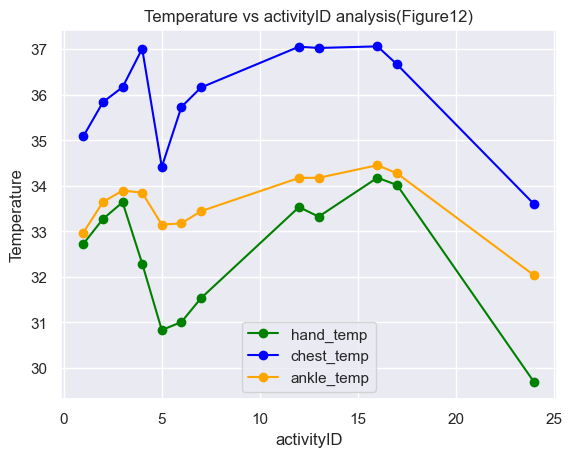

In [45]:
x.plot(kind='line',marker='o',label='hand_temp',color='green')
y.plot(kind='line',marker='o',label='chest_temp',color='blue')
z.plot(kind='line',marker='o',label='ankle_temp',color='orange')
plt.ylabel('Temperature')
plt.title("Temperature vs activityID analysis(Figure12)")
plt.legend()
plt.show()


In the above graph, I compare the mean temperature of hand,chest and ankle for differet activities. 

**From Figure12**

Here, I analysed the temperature and activities performed. There is a dip across all three temperature trend in running and ropejumping. mean chest temperature is highest among the all.

## 4.11 average temperate based on subject

**From figure13**

I analysed the average temperature from hand,chest,ankle of various subject. Highest temperature recorded from chest while hand was least. we can see a drop in temperature across all the readings in subject9. whereas subject5 has highest chest and hand temperature.

In [46]:
df_3=pd.DataFrame(train_df)
average_temp_by_subject=df_3.groupby('subjectID')[['hand_temp','chest_temp','ankle_temp']].mean()
print(average_temp_by_subject)


           hand_temp  chest_temp  ankle_temp
subjectID                                   
1          32.429735   35.236440   33.665745
2          32.358902   36.349257   34.264617
3          31.898849   35.794780   33.525184
4          31.921919   35.121512   33.583527
5          34.770629   37.439005   34.203405
6          32.299477   35.833406   34.722050
7          32.949424   36.757618   32.234816
8          33.172526   36.717892   33.358231
9          25.054440   32.239033   31.425211


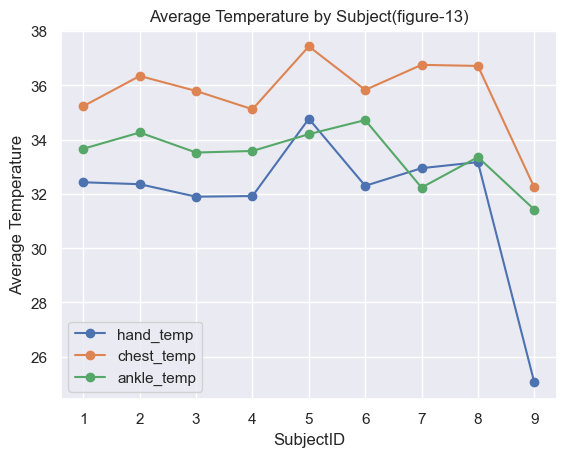

In [47]:
average_temp_by_subject.plot(kind='line', marker='o')

# Set plot labels and title
plt.xlabel('SubjectID')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Subject(figure-13)')

# Show the plot
plt.show()

## 4.12 Sensor Analysis

**From Figure 14,15,16**-

As there are 3 chest_accelaration ('chest_acc16_1','chest_acc16_2','chest_acc16_3'), I plot a graph for three readings with subjects.Similarly I did the same thing with 3 hand and 3 ankle accelaration. There is a dip in the trend in hand accelaration16-2 as we get to subject8. There is a dip in chest accelaration3 for subject 2 aand subject 9. 

### 4.12.1 average chest accelaration based on subject


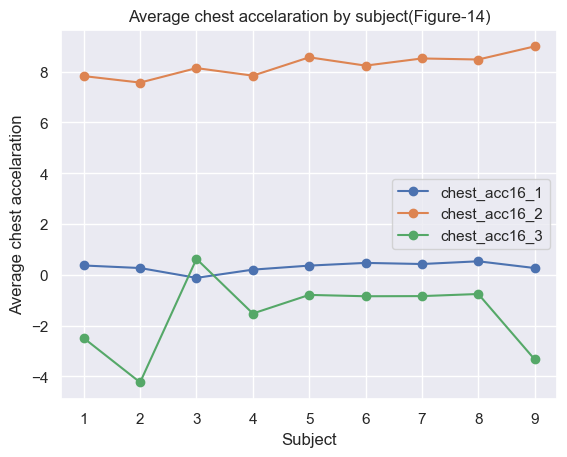

In [48]:
df_4=pd.DataFrame(train_df)
average_chest_acc_by_subject=df_4.groupby('subjectID')[['chest_acc16_1','chest_acc16_2','chest_acc16_3']].mean()
average_chest_acc_by_subject.plot(kind='line',marker='o')
plt.xlabel('Subject')
plt.ylabel('Average chest accelaration')
plt.title('Average chest accelaration by subject(Figure-14)')
plt.show()


### 4.12.2  sensor analysis-average hand accelaration by subject

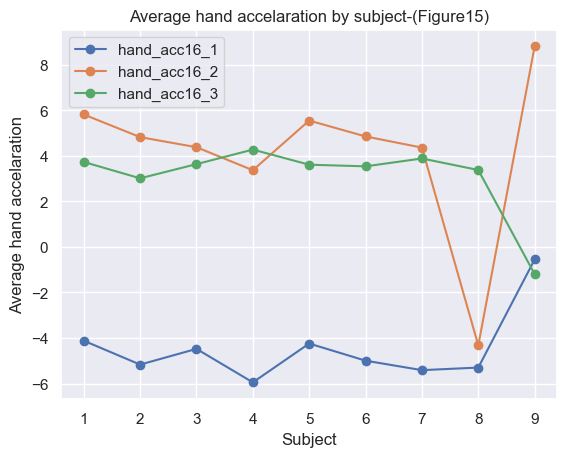

In [49]:
df_4=pd.DataFrame(train_df)
average_hand_acc_by_subject=df_4.groupby('subjectID')[['hand_acc16_1','hand_acc16_2','hand_acc16_3']].mean()
average_hand_acc_by_subject.plot(kind='line',marker='o')
plt.xlabel('Subject')
plt.ylabel('Average hand accelaration')
plt.title('Average hand accelaration by subject-(Figure15)')
plt.show()

### 4.12.3 sensor analysis- average ankle accelaration by subject 

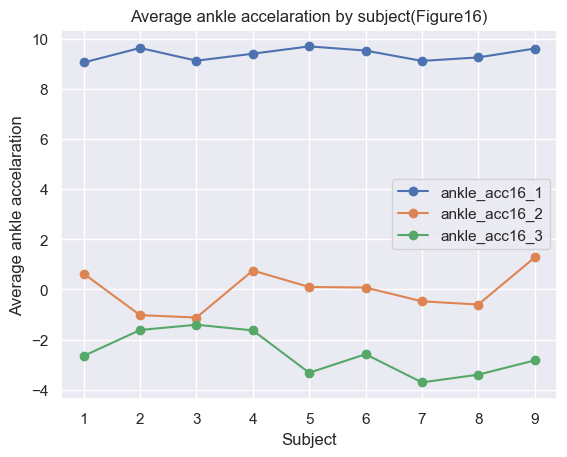

In [50]:
df_4=pd.DataFrame(train_df)
average_ankle_acc_by_subject=df_4.groupby('subjectID')[['ankle_acc16_1','ankle_acc16_2','ankle_acc16_3']].mean()
average_ankle_acc_by_subject.plot(kind='line',marker='o')
plt.xlabel('Subject')
plt.ylabel('Average ankle accelaration')
plt.title('Average ankle accelaration by subject(Figure16)')
plt.show()

## 4.13 Correlation matrix

correlation matrix quicky help us to identify and visualize the strong positive and negative correlations between pairs of variables in our dataset.Here I create heatmap which is a graphical representation of data where individual values contained in a matrix are represented as colors. 

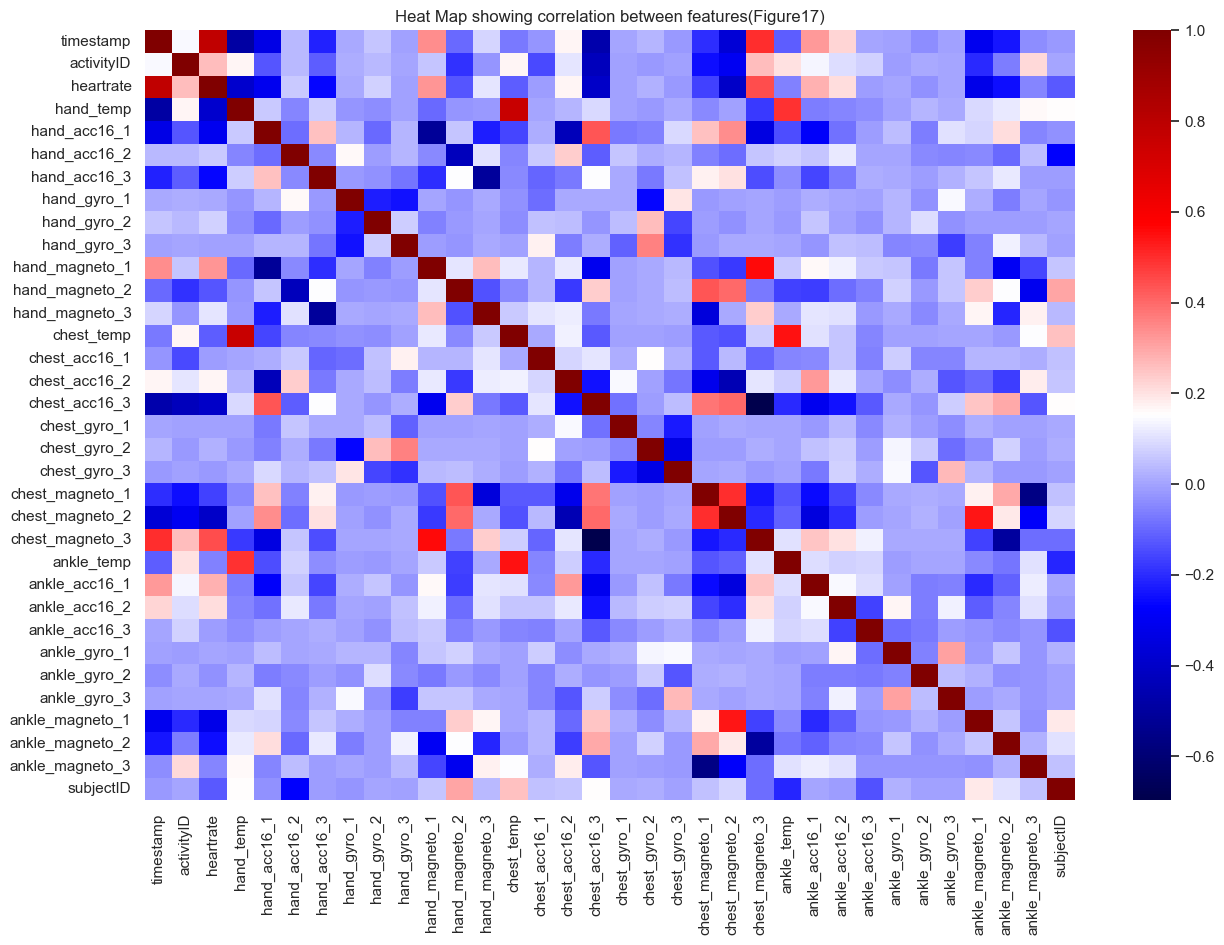

In [51]:
df_corr = test_df.corr() #quick correlation check
f, ax = plt.subplots(figsize=(15,10))
sn.heatmap(df_corr,mask=np.zeros_like(df_corr),cmap = "seismic",ax=ax) #seaborn is an easy way to plot the heat map
plt.title("Heat Map showing correlation between features(Figure17)")
plt.show()

**From figure-17**

- heartrate and hand_temp are strongly negatively correlated
- timestamp and heartrate positive correlated
- hand_temp and chest_temp are positively correlated
- hand_temp and ankle_temp are positively correlated
- ankle_temp and chest_temp are positively correlated.


considering the 1st correlaton,I can see that heart rate and hand temperature are strongly negatively correlated. I want to check if those activities that had low hand temperature has higher heart rates.It implies that activities that are more physically demanding will result in decrease in hand temperature.


Below, I will do another heatmap to quickly and fairly analyse the correlation between the features of heartrate with activityID and subjectID. Then I will do it similarly on Hand temperature. This will help to make further hypothesis testing.

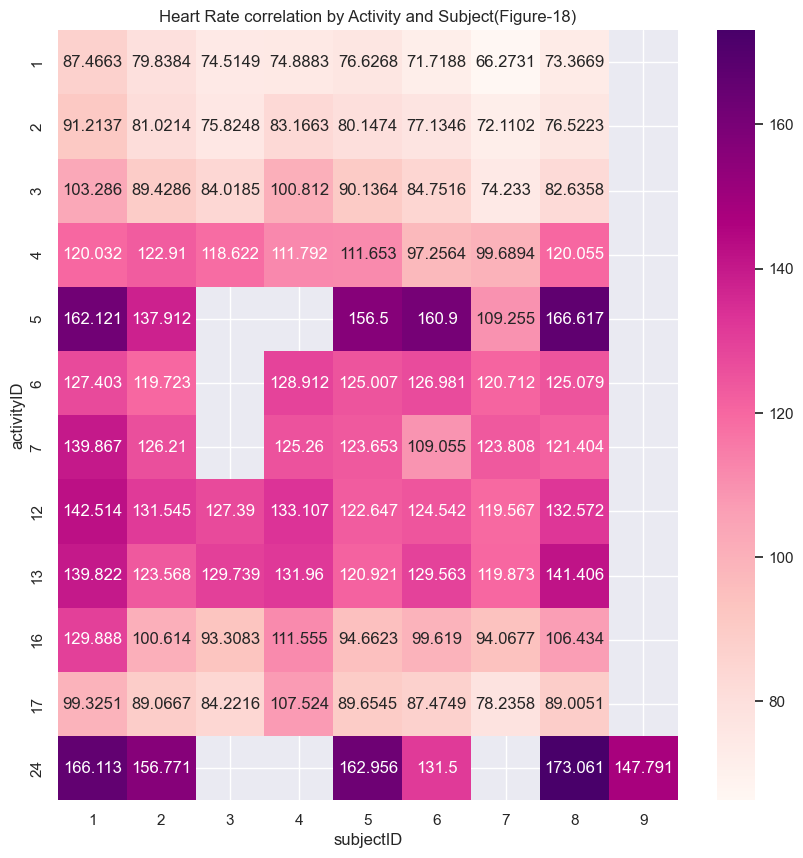

In [52]:
df_corr1 = test_df.groupby(["activityID","subjectID"] , as_index=False).mean()[["activityID","subjectID","heartrate"]].pivot(index="activityID",columns="subjectID",values="heartrate")

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(df_corr1, cmap="RdPu", annot=True, fmt='g', ax=ax)
ax.set_title("Heart Rate correlation by Activity and Subject(Figure-18)")
plt.show()


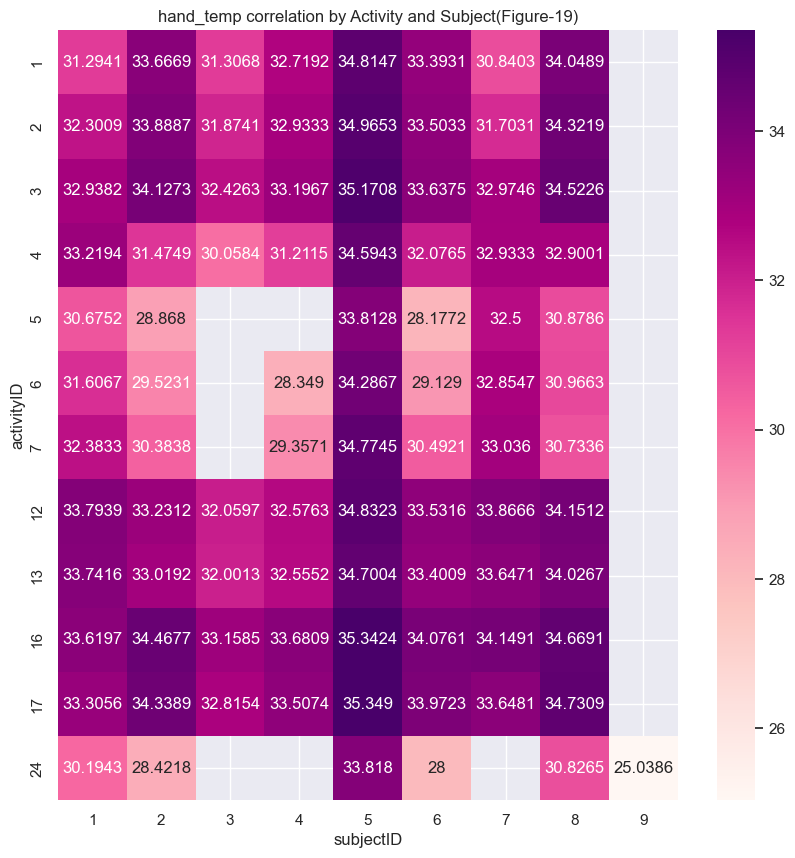

In [53]:
df_corr2 = test_df.groupby(["activityID","subjectID"] , as_index=False).mean()[["activityID","subjectID","hand_temp"]].pivot(index="activityID",columns="subjectID",values="hand_temp")

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(df_corr2, cmap="RdPu", annot=True, fmt='g', ax=ax)
ax.set_title("hand_temp correlation by Activity and Subject(Figure-19)")
plt.show()


As seen in Figure-19, Subject-5 had higher handtemp compared to other subjects. Activity-24 and 5 had a low hand temperature throughout the subjects and had a high heartrate also. 

Thus I beleive these two activities is more physically demanding and has high heartrate will have a reduction in the temperature of subject's hand. So taking this consideration I will do the hypothesis testing in Section-5.




# 5. Hypothesis testing

Hypothesis testing is a statistical method used to make inference about the parameters based on sample data. It involves formulating a hypothesis and using statistical technques to decides if it reject or fail to reject null hypothesis.

The null hypothesis ($H_0$) is a statemnet or claim being made which we will try to disapprove.
The alternative hypothesis ($H_1$) is that we are trying to prove and which is accepted if we have sufficient evidence to reject the null hypothesis.


A one-tailed test or single-tailed test is a statistical test in which the criticaal area of a distribution is single sided i.e. greater-than or less-than a certain value,but not both. If the sample tested failes into the single-sided critical area, the alternative hypothesis will be accepted instead of null.


I conduct two hypothesis tests here -


**From this hypothesis-1, Null hypothesis has been rejected proving that hand temperature decrease with activities having higher physical exertion if heart rate increases.**

**From the hypothesis-2, Null hypothesis has been rejected proving that heart-rate increases with activities having higher physical exertion.**

I perform the two hypothesis tests below in Hypothesis testing-1 and hypothesis testing-2

## 5.1 Hypothesis testing -1


**If heartrate of physicalactivity increase, then handtemp of lighter activities is greater than the average hand temperature of rigorous activities.

$\mu_{1}$ = mean hand temperature for activity 2(sitting)

$\mu_{2}$= mean hand temperature for activity 5 (running)

Null Hypothesis: $H_0$ : $\mu_{1} = \mu_{2}$

Alternative hypohesis: $H_1$ : $\mu_{1} > \mu_{2}$


$$t=\frac{(\mu_1-\mu_2)}{\sqrt{\frac{S^2}{n_1}+\frac{S^2}{n_2}}}$$



We will perform single tailed test here 99% confidence interval which gives our $\alpha$=0.01

We are using bootstrapping here, It is a statistical process for generating multiple simulated samples from a single dataset. It plays a vital role for generating a valid nonbiased representation of the population. 


The function "Bootstrapping" can be used for bootstrapping to estinmate the distribution of the mean of a specified feature within a particular activity. It involves resampling with replacemnet to create multiple dataset and calculate statistics.

The function "hypothesis" is used for t-test and finding p-value. We can see the p-value/2<alpha, (for single tail test), then it rejects the null hypothesis.So therefore, we can conclude that there is sufficient evidence to reject null hypothesis and thus doing activities that has high exertion has lower handtemp. From here, we can roughly estimate the intensity of any activity by just looking into the heartrate.



In [54]:
import statistics
def bootstraps(df,activity,numsamples,feature):
    samples=[]
    #iterate over specific number of bootstrap sample
    for i in range(numsamples):
        #Randomly sample data for the specified activity and feature
        samples.append(statistics.mean(np.random.choice(df[df["activityID"] == activity]
                                                        [feature],size=int((len(test_df)*0.0001))))) #small sample used here 0.01% of the data 
    #calculating mean and standarddeviation of sample     
    avg = statistics.mean(samples)
    stdavg = statistics.stdev(samples)
    return avg, stdavg,numsamples


In [55]:
#for running
Rmean, rstd,rnum=bootstraps(test_df,5,30,"hand_temp")

In [56]:
print(Rmean, rstd,rnum)

31.260416666666668 1.145653721554922 30


In [57]:
#for sitting
smean,sstd,snum=bootstraps(test_df,2,30,"hand_temp")
print(smean,sstd,snum)

33.022222222222226 0.6504385616471784 30


In [58]:

def hypothesis(mu1,mu2,sd1,sd2,n1,n2):
    x=mu1-mu2
    y=np.power(((sd1**2)/n1)+((sd2**2)/n2),0.5)
    t=x/y
    return t


In [59]:
from scipy import stats

In [60]:
s=hypothesis(smean,Rmean,sstd,rstd,snum,rnum)
p_val=stats.t.sf(abs(s),rnum+snum-2)
print(s)
print(p_val)
alpha=0.01
if p_val/2 < alpha:
    print('Reject the Null Hypothesis H0 at {} % significance level'.format(alpha*100))
else:
    print('Failed to reject the Null Hypothesis H0 at {} % significance level'.format(alpha*100))


7.32478170149838
4.170493092601239e-10
Reject the Null Hypothesis H0 at 1.0 % significance level


## 5.2 Hypothesis testing 2

As we know there is a relationship between heartrate and activities performed. Higher the rate of activities ,higher will be the heartrate. 

ropejumping is more physically demanding activities than lying. Considering that , I build up the hypothesis below.

If there is a relationship between activities performed and heartrate, then rigorous activities will result higher heartrate than light activties.

$\mu_{rjHR}:$ Mean heartrate for ropejumping activities.

$\mu_{lyingHR} :$ Mean heartrate for lying activities.

Null Hypothesis $H_0$= The average heart rate for rigorous activities is same as average for light activities

$$\mu_{rjHR}=\mu_{lyingHR}$$

Alternative Hypothesis $H_1$= The average heart rate for rigorous activities is higher than the average heart rate for lighter activities.

$$\mu_{rjHR}>\mu_{lyingHR}$$

In [61]:
rjmean,rjstd,rjnum=bootstraps(test_df,24,30,"heartrate")
print(rjmean,rjstd,rjnum)

158.94444444444446 12.368878054081158 30


In [62]:
Lmean, lstd,lnum=bootstraps(test_df,1,30,"heartrate")
print(Lmean,lstd,lnum)

73.71111111111111 6.10742487220302 30


In [63]:
s=hypothesis(rjmean,Lmean,rjstd,lstd,lnum,rjnum)
p_val=stats.t.sf(abs(s),rjnum+lnum-2)
print(s)
print(p_val)
alpha=0.01
if p_val/2 < alpha:
    print('Reject the Null Hypothesis H0 at {} % significance level'.format(alpha*100))
else:
    print('Failed to reject the Null Hypothesis H0 at {} % significance level'.format(alpha*100))


33.842494372219114
3.4363930474391474e-40
Reject the Null Hypothesis H0 at 1.0 % significance level


From the above two hypothesis testing, I can say - Hand-temp and heartrate are negatively correlated for any activities. That means, If there is any heavy ativities, then their average heartrate will increase and hand-temp will reduce. If there is any light activitites, then their average heartrate will decrease and results in increasing of hand-temperature. 

Now I will move forward to next part -Model selection

# 6. Modeling

Model selection in the Machine learning and statistics refers to the process of choosing the best algorithm or model for a given task or problem. Here I imported some libraries to execute the models. 

In [64]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
#from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

## 6.1 drop unneccessary features

I mainly use logisticRegression and RandomForestClassifier here. In order to increase the accuracy, I eliminate some variables like subjectID and timestamp since these are numerical values which algorithm would use in their calculations. but it has no special significance. 

In [65]:
train_df=train_df.drop(['timestamp','subjectID'],axis=1)

## 6.2 features and target selection


The main goal of this analysis is to build a model that can predict the various activities performed by the subjects using the sensor data and other features. The feature needed to be predicted is -ActivityID. So I separated the other feature in df_features and activityID in df_target. This a common preprocessing step in ML where I can separate the input features from target variables that the model trying to predict

In [66]:
df_features=train_df.drop(['activityID'],axis=1)
df_target=train_df['activityID']

## 6.2 Scaling


Scaling is another preprocessing step in ML that uses to normalise the fearyres of a dataset. Since our data has many outliers , RobustScaler has been used instead of standard or minmax scaler. Robust scaling is useful when data has outliers, as it scales the features based on interquartile range.

Train test split is a function in sklearn commonly used in machine learning to split the dataset into training and testing sets. The purpose of this split is to train a model on one subset (training set) and evaluate the performanace on another subject (testing set) to assess its ability to new unseen data.

In [67]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [68]:
#Instantiate the robust scaler
scaler = RobustScaler()

#splitting train test
X_train, X_test, y_train, y_test = train_test_split(df_features,df_target, test_size=0.3, random_state=33)


# Apply the RobustScaler to the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 6.3 Principle component analysis-Dimensionality reduction

Principal components analysis (PCA) is a dimensionality reduction techniques used in MachineLearning and statistics. It reduces number of dimension in a datasets while preserving the origibal variability in a dataset. 
It linearly transform the dataset into a new feature system where most of the variation in the data can be described in the fewer dimension. It is specifically useful while dealing with data of high dimensionality or multicollinearity.


**Explained Variance:** The amount of variance explained by each component.
• This gives us an idea of how good our approximation will be.
• The larger the value, the more variance is explained.

**Cumuulative Explained Variance-** The cumulative sum of the explained variance is calculated and plotted against the number of components. A red threshold line is added at 94% to help visualise how many components are needed to reach a certain level of explained variance.


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

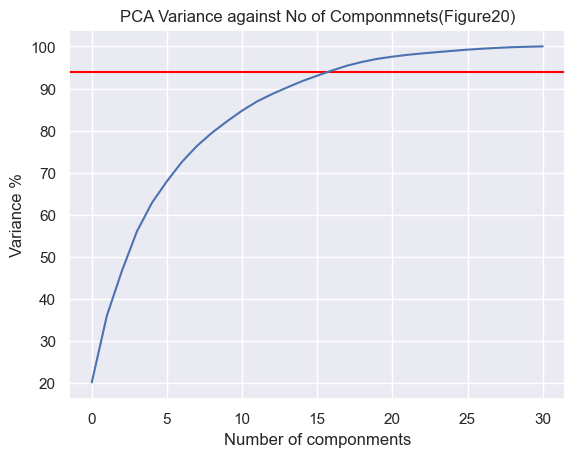

In [69]:
from sklearn.decomposition import PCA

# Dimensionality reduction
pca = PCA()
pca.fit(X_train_scaled)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against No of Componmnets(Figure20)")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid

In [70]:
var #explained_variance_ratio_

array([0.20173363, 0.15810815, 0.1063172 , 0.09416592, 0.06801491,
       0.05154707, 0.04596094, 0.03786902, 0.03128854, 0.02717992,
       0.02526931, 0.02190685, 0.01761837, 0.01557638, 0.0150213 ,
       0.01299971, 0.01245457, 0.01135659, 0.00889947, 0.00717096,
       0.00508885, 0.00435004, 0.00336376, 0.00307285, 0.0029703 ,
       0.00275567, 0.00228182, 0.00193643, 0.00174487, 0.00104956,
       0.00092702])

In [71]:
#Fit PCA on scaled training set and transform both training and testing sets
pca=PCA(n_components=15)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

# 6.4 Metrics Display Function



**Precision**- measure the accuracy of the positive predictions made by the model. It is the ratio of true positive prediction by total number of positive predictions made by model.



$$Precision=\frac{TP}{TP+FP}$$

**Recall**- ability of a model to capture all the positive instances. Ration of true positive predictions to the total number of actual positive instances.


$$recall = \frac{TP}{TP+FN}$$

**F1-score**- harmonic mean of precision and recall. $$F1 score =\frac{2\times(Precision \times recall)}{(Precision+Recall)}$$

**Accuracy**- It is the  ratio of correctly predicted instances to the total number of instances. 
                    $$Accuracy =\frac{(TP+TN)}{(TP+TN+FP+FN)}$$

**Confusion matrix** is a table that shows the performance of a classification algorithm. It shows the count of truepositive, truenegative,falsepositive,falsenegative. confusion_matrix in scikit-learn calculates the confuson matrix.

**ConfusionMatrixDisplay** is a class in scikit-learn that use to display confusion matrices with visualisations.

These are the metrics used for evaluation of models. These metrics provides a view of how well a model is performing and where it might need improvement.


In [72]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
def metrics_display(y_true,y_pred):
    accuracy=accuracy_score(y_true,y_pred)
    precision=precision_score(y_true,y_pred,average=None).mean()
    recall=recall_score(y_true,y_pred,average=None).mean()
    f1=f1_score(y_true,y_pred,average=None).mean()
    err=1-accuracy
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"Accuracy : {accuracy}")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"f1score: {f1}")
    print(f"error :{err}")
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=df_1['activityID'].unique())
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()
    ##print(conf_matrix)

# 6.5 Logistic Regression

In the logistic Regression ,the logistic function(sigmoid function) is used to model the relationship between feature variables(Independent) and target variable(dependent). It is implemented as a linear model for classification rather than regression. 

Accuracy : 0.4621794871794872
precision: 0.47244375828075486
recall: 0.3950757797824463
f1score: 0.3877820524198348
error :0.5378205128205128


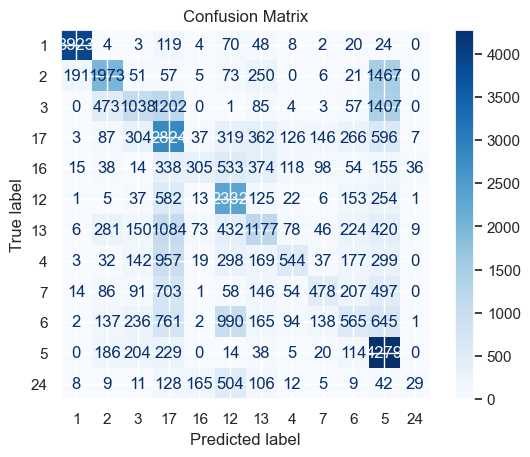

In [73]:
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg1.fit(X=X_train_pca, y=y_train )
y_pred_lr = log_reg1.predict(X_test_pca)
metrics_display(y_test, y_pred_lr)

The accuracy of the logistic regression is 46%. Where as precision is 47%.I will find the accuracy of random forest classifier to check which one is the better model.

# 6.6 Random Forest Classifier

Random Forest is an ensemble learning algorithm used for classsification task. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

Accuracy : 0.8675925925925926
precision: 0.8770133111059014
recall: 0.8484947411395852
f1score: 0.8598118562746362
error :0.13240740740740742


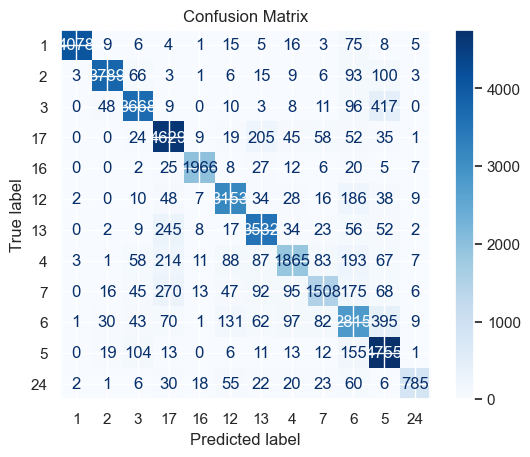

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs =4)
rfc.fit(X_train_pca,y_train)
y_pred_rf = rfc.predict(X_test_pca)
metrics_display(y_test,y_pred_rf)

The accuarcy of randomforest classifier is very high 86% followed by precision as 87% with very small error rate. I can consider this model in my analysis.


# 6.7 Comparing predicted data and actual data

I setup this function for evaluating the predictions of our model against the actual values in the test set. It provides a good comparison between the predicted and actual values, which help in understanding the model's performance.  It looks like random forest classifier correctly predicts the values whereas there are some erros in logistic regression. I checked the length of the predicted test data and actual test data for verification.

In [75]:
#This method is used to compare the predicted data with the actual data.
def compare_predicted_data(predicted_data,y_test):
    print("Total count of predicted test data is {}".format(len(predicted_data)))
    print("Total count of actual test data is {}".format(len(y_test)))
    prediction_df=pd.DataFrame({
        "Predicted Value": predicted_data,
        "Actual Value":y_test
    })
    prediction_df.reset_index(drop=True,inplace=True)
    return prediction_df

In [76]:
df_LR=compare_predicted_data(y_test,y_pred_lr) #logistic regression
df_LR.head(20)

Total count of predicted test data is 42120
Total count of actual test data is 42120


Predicted Value  Actual Value
0                 7             3
1                 1             1
2                 1             1
3                13            13
4                 6             6
5                 7             3
6                 7             3
7                16             4
8                 1             1
9                17            17
10                5             5
11                4            13
12                5             6
13                3             4
14               13            16
15                1             1
16                1             1
17                5             7
18                2             1
19               16             4

In [77]:
df_RFC=compare_predicted_data(y_test,y_pred_rf) #random forest classifier
df_RFC.head(20)

Total count of predicted test data is 42120
Total count of actual test data is 42120


Predicted Value  Actual Value
0                 7             7
1                 1             1
2                 1             1
3                13            13
4                 6             6
5                 7             7
6                 7             7
7                16            16
8                 1             1
9                17            17
10                5             5
11                4             4
12                5             5
13                3             3
14               13             7
15                1             1
16                1             1
17                5             5
18                2             2
19               16            16

hence,I am considering randomforest classifier model in my analysis as it is indeed giving a nice accuracy and predicted value. 

# 7. Conclusion

I am considering randomforest classifier model in my analysis as it is indeed giving a nice accuracy and predicted value.
It is extremely possible that there are some inaccuracies in the data due to sensor drop or faulty callibration.I believe there is no problem with overfitting because, the dataset was not particularly unbalanced. Overfitting is a common challenge here where a models learns the training set too well, capturing noise and random fluctuations that fails to represent the  patterns in the data. Due to this, model performs well on the training set but fails to do so in new, unseen data.Overfitting is a important concern in ML. and finding the correct balance between model complexity and generalization is essential for building effective models.


To summarise the things, The physical activity monitoring data has been analysed and i gained various insights through EDA after doing neccessary data collection and data cleaning. In EDA we get a negative correlation between heartrate and handtemp for activities. Considering this , I conduct two hypothesis test to verify the correlation. 
Finally , I found a good model -randomForestClassifier, which give good accuracy while classifying the activities comparing to logisticregression. 

As it is a big dataset,It could offer more useful information.it will help in the development of hardware and software. More analysis is required.


The insights derived from this data revealed that heartrate and handtemp can be used as an indicators of physicalactivity. Multiple attributes can be used to make accurate predictions.

# 8. Bibliography
1. A. Reiss and D. Stricker. Introducing a New Benchmarked Dataset for Activity Monitoring. The 16th IEEE International Symposium on Wearable Computers (ISWC), 2012.

2. A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical Activity Monitoring. The 5th Workshop on Affect and Behaviour Related Assistance (ABRA), 2012.

3. https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html

4. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

6. https://scikit-learn.org/stable/modules/preprocessing.html
7. scaling - https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/#:~:text=Line2D%20at%200x7f6e25e66e10%3E%5D-,Robust%20Scaling,and%20the%2050th%20percentile%20point.
8. Confusion matrix- https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/#:~:text=A%20Confusion%20matrix%20is%20an,by%20the%20machine%20learning%20model.
9. https://github.com/andreasKyratzis/PAMAP2-Physical-Activity-Monitoring-Data-Analysis-and-ML/blob/master/pamap2.ipynb
10. https://github.com/EdnaEze/Physical-Activity-Monitoring/blob/main/DSRM-Edna.ipynb


In [80]:
filepath="DSRM_2.ipynb"
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 3996
